In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from src.preprocessing import PreprocessDataTrainTestSplit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import  StandardScaler

from src.init_parameters import init_parameters
from src.vectorize import vectorize_data
from src.gibbs_sampler import gibbs_sampler_joint_post

In [61]:
########
# Plot #
########

def plot_signal(vec, title = "signal"):
    fig = px.line(vec, template = "plotly_dark", title = title)
    fig.show()

def plot_sample(
    sampling: np.ndarray,
    size: Optional[int] = 10,
    levels: Optional[int] = 20,
    title: Optional[str] = "sampling"
) -> None:
    """
    Plot a scatter plot and kernel density estimate of a 2D sampling.

    Args:
    - sampling (np.ndarray): 2D array representing the sampled data.
    - size (Optional[int]): Size of the figure (default is 10).
    - levels (Optional[int]): Number of levels in the contour plot (default is 20).
    - title (Optional[str]): Title of the plot (default is "sampling").

    Returns:
    None
    """
    fig_sampling = plt.figure(figsize=(size, size))
    plt.scatter(x = sampling[:,0], y = sampling[:,1], marker ="o", alpha = 0.1)
    sns.kdeplot(x = sampling[:,0], y = sampling[:,1], alpha = 1, levels = levels, cmap= "Blues" )
    plt.title(title)
    fig_sampling.show()

def plot_mcmc_traj(
    traj: np.ndarray,
    size: Optional[int] = 10,
    trajname: Optional[str] = "HM"
) -> None:
    """
    Plot the trajectory of an MCMC sampler.

    Args:
    - traj (np.ndarray): 2D array representing the MCMC trajectory.
    - size (Optional[int]): Size of the figure (default is 10).
    - trajname (Optional[str]): Name of the MCMC sampler (default is "HM").

    Returns:
    None
    """
    traj_length = traj.shape[0]
    dim = traj.shape[1]
    colors = sns.color_palette("viridis", traj_length).as_hex()
    plt.figure(figsize=(size, size))
    sns.set(style='dark')

    if dim==2 or dim > 5:
        plt.scatter(x = traj[:,0], y = traj[:,1], marker ="o", alpha = 0.5, color=colors)
    else:
        df = pd.DataFrame(traj, columns = np.arange(dim))
        df["step"] = np.arange(traj_length)
        sns.pairplot(df, hue="step", palette = colors)

    plt.title(f"Trajectory of the {trajname} sampler")
    plt.show()

def plot_autocorrelations(
    traj: np.ndarray,
    size: Optional[int] = 10,
    trajname: Optional[str] = "HM",
    nlags: Optional[int] = 80
) -> None:
    """
    Plot autocorrelations of an MCMC trajectory.

    Args:
    - traj (np.ndarray): 2D array representing the MCMC trajectory.
    - size (Optional[int]): Size of the figure (default is 10).
    - trajname (Optional[str]): Name of the MCMC sampler (default is "HM").
    - nlags (Optional[int]): Number of lags to plot (default is 80).

    Returns:
    None
    """
    dim = traj.shape[1]
    plt.figure(figsize=(size,size))
    for i in range(dim):
        pd.plotting.autocorrelation_plot(traj[:,i], label=f'Autocorrelation of dim {i}',linewidth=2)
    plt.title(f"Autocorrelations {trajname}")
    plt.xlim((0,nlags)) #limit lags
    plt.show()


def plot_hist(sample, title, nbins = 400):
    fig = px.histogram(sample,
                   histnorm='probability density',
                   title = title,
                   nbins = nbins
                  )
    fig.show()

NameError: name 'Optional' is not defined

In [31]:
SEED = 0
root_path = Path(os.getcwd())
data_path = root_path.joinpath("Macro1.csv")

# Simple validation

In [32]:
preprocess_train_test = PreprocessDataTrainTestSplit(data_path=data_path, split_date='1999-12-01', normalize=True, max_date='2006-12-31')
train_df, test_df = preprocess_train_test.process()

X = train_df.drop('INDPRO', axis=1).values
y = train_df['INDPRO'].values

X_test = test_df.drop('INDPRO', axis=1).values
y_test = test_df['INDPRO'].values

In [35]:
np.random.seed(SEED)
T = X.shape[0]
k = X.shape[1]
l = 0
a = 1
b = 1
A = 1
B = 1
N_ITER_MH_SIGMA2 = 100000
BURN_IN_PERIOD_MH_SIGMA2 = 40000
JUMP_SIZE_MH_SIGMA2 = 1
N_ITER_GIBBS = 5000
BURN_IN_PERIOD = 1000

dct = init_parameters(T, k, l, a, b, A, B, X, N_ITER_MH_SIGMA2, BURN_IN_PERIOD_MH_SIGMA2, JUMP_SIZE_MH_SIGMA2)
data0 = vectorize_data(dct=dct,T=T,k=k,l=l,a=a,b=b,A=A,B=B)
data1, accu = gibbs_sampler_joint_post(data0, n_iter = N_ITER_GIBBS, burn_in_period=BURN_IN_PERIOD, n_iter_zi=1, debug = True)

In [ ]:
dct["s"]

In [60]:
dct["sigma2"]

0.03334287372730403

In [62]:
np.mean(accu["q post"])

0.03707300000000001

In [52]:
accu["sigma2 post"]

[0.00159142477368181,
 0.0015056513862107663,
 0.0016875359596393302,
 0.001752283342233518,
 0.0015465421814957216,
 0.0017260014320308178,
 0.0015789303150839731,
 0.001497334376306499,
 0.001388109394642529,
 0.0012669994695126286,
 0.001447136673974608,
 0.0015033733048435294,
 0.0014744069583377854,
 0.0015328172734861204,
 0.0014019981599944888,
 0.0014261330372173796,
 0.0014716495282641239,
 0.0016834936708671946,
 0.0014573866592867096,
 0.0013892971318339884,
 0.0014545105845166298,
 0.0014941222014727828,
 0.001449595184370664,
 0.0014214067684512142,
 0.0014575950703374846,
 0.001558669667726839,
 0.0015854802604524014,
 0.0015797182413071437,
 0.0017266394239427117,
 0.0016036857564544135,
 0.0015157924866163713,
 0.00154785663534624,
 0.0015547776037288478,
 0.0018154097301227028,
 0.0014601639728850952,
 0.0013809388573626461,
 0.0015495494484005716,
 0.0015664453354537968,
 0.0015951660167196032,
 0.0013482567163732766,
 0.0014652472297875278,
 0.0015633194069543674,
 0

In [39]:
array_beta_pred = accu["beta post"]

In [53]:
beta_pred =0
for item in array_beta_pred:
    beta_pred+=item
beta_pred = beta_pred/(N_ITER_GIBBS-BURN_IN_PERIOD)
beta_pred = beta_pred[0]

In [56]:
beta_pred

array([ 1.00306192e+00,  9.94537693e-01,  0.00000000e+00,  3.60732732e-06,
       -2.09253458e-07,  9.93540232e-01,  1.00979450e+00,  2.20385536e-05,
        5.71823774e-06, -1.49995790e-06,  9.97523294e-01,  3.36208830e-06,
        4.41768821e-06,  1.78239135e-08,  1.00489685e+00,  0.00000000e+00,
        2.75004226e-07,  9.92462921e-01,  1.00214120e+00,  0.00000000e+00,
       -1.11771276e-06,  2.85616362e-06,  9.99425478e-01,  1.00119756e+00,
        2.40910232e-05,  9.96244836e-01, -1.68191928e-05, -1.94943338e-06,
        0.00000000e+00,  1.14362016e-06,  6.38861929e-07,  0.00000000e+00,
        1.00145766e+00,  5.05934209e-05, -1.02882724e-06,  0.00000000e+00,
        4.17428373e-06,  9.14749378e-06,  9.99838576e-01, -1.27593038e-06,
        1.00113340e+00,  1.00027213e+00,  1.00021731e+00,  1.00069337e+00,
       -6.44667379e-07,  0.00000000e+00,  1.00325316e+00,  9.97623261e-01,
       -2.67654382e-07, -5.70759396e-07,  9.98337048e-01,  1.00822333e-07,
        1.00118005e+00,  

In [57]:
y_pred_train = X@beta_pred
y_pred_test = X_test @beta_pred

In [59]:
y_test

array([ 0.2722,  0.3917,  0.6738,  0.199 ,  0.0728, -0.1093, -0.3154,
        0.3508, -0.3213, -0.0065, -0.2751, -0.6714, -0.5684, -0.2683,
       -0.2705, -0.6569, -0.5949, -0.4746, -0.1778, -0.3107, -0.4374,
       -0.4749,  0.0152,  0.5388,  0.0123,  0.6857,  0.3986,  0.3826,
        0.8543, -0.2121,  0.0177,  0.0905, -0.2818,  0.4578, -0.4314,
        0.6049,  0.2534, -0.189 , -0.7034,  0.0425,  0.034 ,  0.5334,
       -0.2294,  0.5134,  0.0645,  0.6904, -0.1027,  0.2417,  0.4814,
       -0.4749,  0.3462,  0.6985, -0.745 ,  0.7056,  0.0283,  0.0644,
        0.8895,  0.1935,  0.6397,  0.4433,  0.6109, -0.0843,  0.1279,
        0.165 ,  0.3789, -0.1878,  0.1466, -1.9047,  1.2145,  0.9371,
        0.5513,  0.1166,  0.0405,  0.2481,  0.3658, -0.1398,  0.375 ,
        0.0118,  0.3268, -0.1715, -0.0363, -0.1249,  0.9536])

In [58]:
y_pred_test

array([ 21.32911422,  32.13179118,  14.0286717 ,  17.67399773,
        24.5845495 ,  20.6987263 ,  -3.3559028 ,  33.86759089,
        23.40342659,   6.79786347,  -8.25098189,  44.53541418,
        -2.64523492,  -3.60717688,  13.29575932,   0.49239927,
        -8.84078789, -18.26994059,  -6.18907593,  24.60353832,
       -23.46217448,  13.76428867,  -5.24727902,  -5.29325963,
        16.68730158,  16.01242814,  11.05223527,   2.95270658,
        12.30154642,   7.8426841 ,  -1.76160492,   9.10595558,
         1.32408547,  11.30545027,   4.46515766,  23.32192598,
        21.25907788,   6.80050414, -38.08276742, -21.09864335,
         8.46394026,  47.937019  ,  30.8426425 ,  40.54585154,
        -8.57513182,   0.25137446,   3.57409798,  21.02045223,
        29.16145949,  13.60164388,  24.97326152,  69.47095074,
         7.52951264,  19.52063527,  11.11071949,  20.21703804,
        55.69793205,  29.1133353 ,  16.69926598, -19.95327454,
        38.37147797,   9.44655211,  30.85375783,  -6.08

In [48]:
r2_train = r2_score(y, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train R2: {}".format(r2_train))
print("Train MSE: {}".format(mse_train))
print("Test R2: {}".format(r2_test))
print("Test MSE: {}".format(mse_test))

Train R2: -1663.0387735501772
Train MSE: 228.16233273783018
Test R2: -3094.655181001812
Test MSE: 718.9091707700551


## Predict using the last $\beta$ sampled

# Cross validation

In [ ]:
preprocess_train_test = PreprocessDataTrainTestSplit(data_path=data_path, split_date='1999-12-01', normalize=False, max_date='2006-12-31')
train_df, test_df = preprocess_train_test.process()

X = train_df.drop('INDPRO', axis=1).values
y = train_df['INDPRO'].values

X_test = test_df.drop('INDPRO', axis=1).values
y_test = test_df['INDPRO'].values

Train R2: 1.0
Train MSE: 1.2545418079601507e-31
Val R2: 0.6380916058417953
Val MSE: 0.031381573620167906


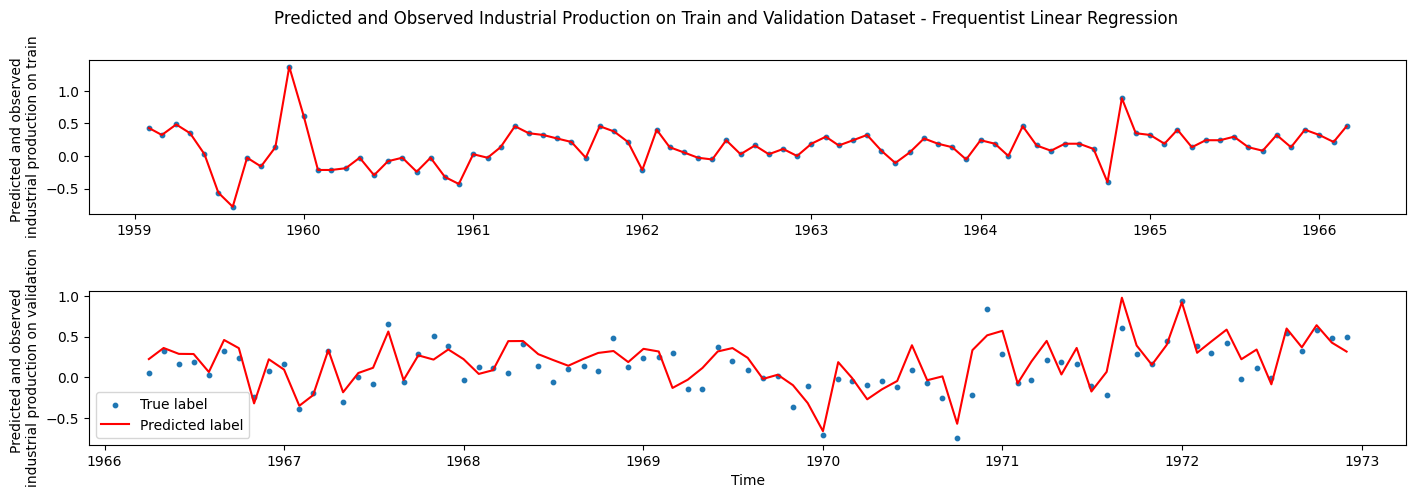

Train R2: 0.99811620337794
Train MSE: 0.00016094006964060441
Val R2: 0.8958219371912455
Val MSE: 0.018398894901128664


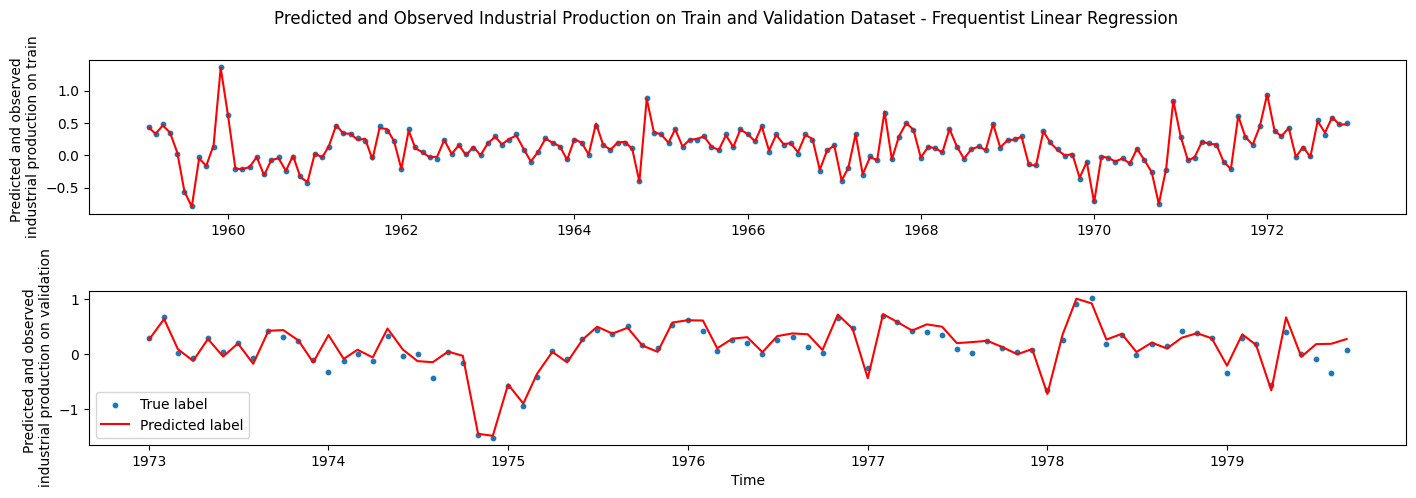

Train R2: 0.9976313836092634
Train MSE: 0.00027352233797907404
Val R2: 0.9814895532446937
Val MSE: 0.003456219724212089


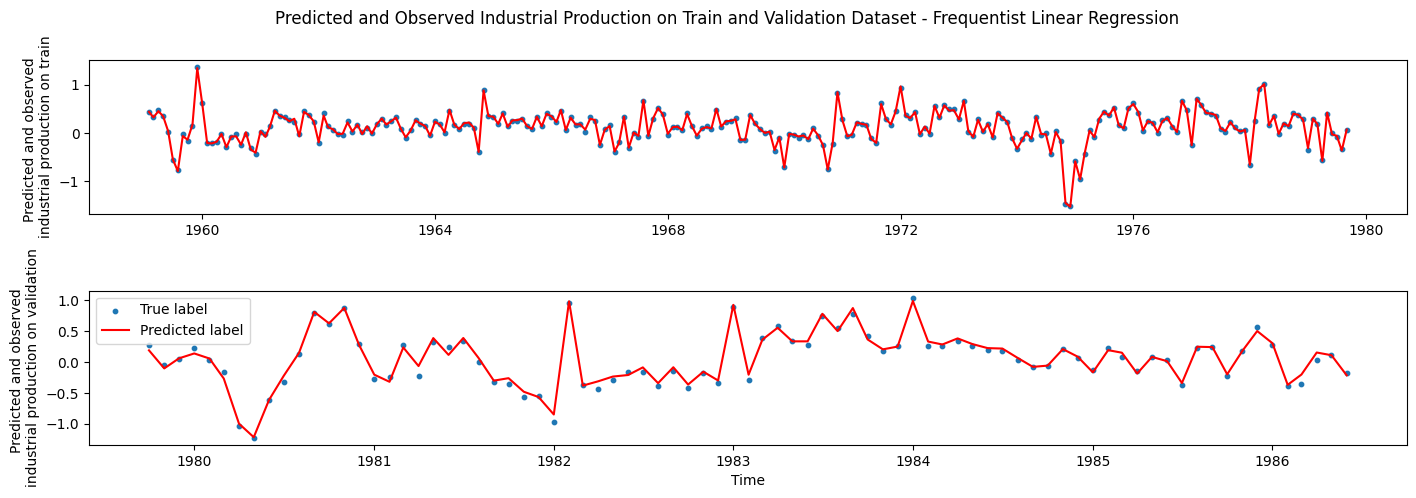

Train R2: 0.9979761176639401
Train MSE: 0.00027134556434786763
Val R2: 0.9885024713504741
Val MSE: 0.001141692976698669


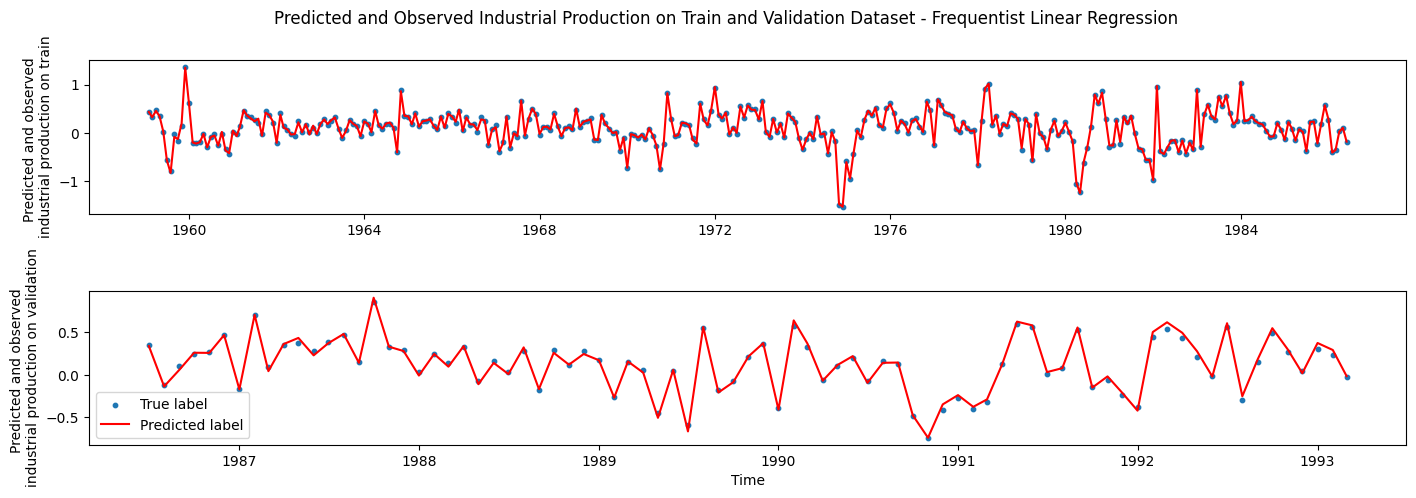

Train R2: 0.9979479593118574
Train MSE: 0.0002611733169627483
Val R2: -5482488851631057.0
Val MSE: 798408248226783.0


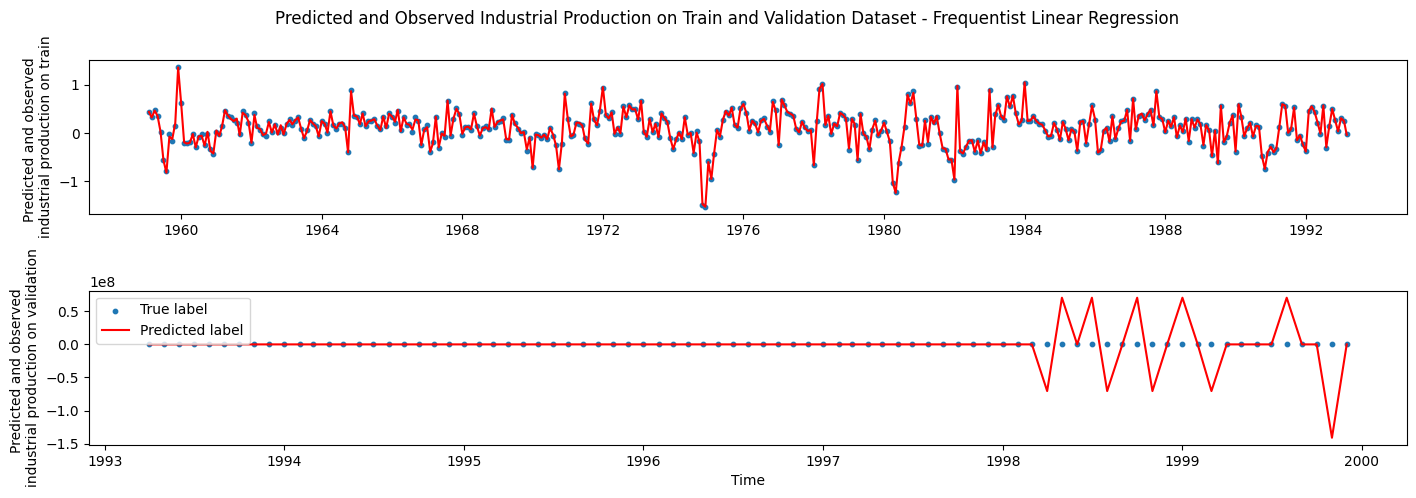

Average MSE - train: 0.0001933962577860589
Average R2 - train: 0.9983343327926002
Average MSE - validation: 159681649645356.6
Average R2 - validation: -1096497770326210.6


In [5]:
tscv = TimeSeriesSplit(n_splits=5)
list_mse_train = []
list_r2_train = []
list_mse_val = []
list_r2_val = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index, :], X[val_index, :]
    y_train, y_val = y[train_index], y[val_index]

    scaler = StandardScaler()
    X_train_transform = scaler.fit_transform(X_train)
    X_val_transform = scaler.transform(X_val)
    
    LR.fit(X_train_transform, y_train)
    y_pred_train = LR.predict(X_train_transform)
    y_pred_val = LR.predict(X_val_transform)

    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    list_mse_train.append(mse_train)
    list_r2_train.append(r2_train)
    list_mse_val.append(mse_val)
    list_r2_val.append(r2_val)

    print("Train R2: {}".format(r2_train))
    print("Train MSE: {}".format(mse_train))
    print("Val R2: {}".format(r2_val))
    print("Val MSE: {}".format(mse_val))

    plt.figure(figsize=(17,5))
    plt.subplot(2, 1, 1)
    plt.scatter(train_df.index[train_index], y_train, marker='o', s=10, label="True label")
    plt.plot(train_df.index[train_index], y_pred_train, color='red', label="Predicted label")
    plt.ylabel("Predicted and observed \nindustrial production on train")

    plt.subplot(2, 1, 2)
    plt.scatter(train_df.index[val_index], y_val, marker='o', s=10, label="True label")
    plt.plot(train_df.index[val_index], y_pred_val, color='red', label="Predicted label")
    plt.xlabel('Time')
    plt.ylabel("Predicted and observed \nindustrial production on validation")
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Predicted and Observed Industrial Production on Train and Validation Dataset - Frequentist Linear Regression")
    plt.legend()
    plt.show()

print("Average MSE - train: {}".format(sum(list_mse_train)/len(list_mse_train)))
print("Average R2 - train: {}".format(sum(list_r2_train)/len(list_r2_train)))
print("Average MSE - validation: {}".format(sum(list_mse_val)/len(list_mse_val)))
print("Average R2 - validation: {}".format(sum(list_r2_val)/len(list_r2_val)))

# Simple Validation

## Standardization

In [6]:
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X_test_transform = scaler.transform(X_test)

## Linear Regression

In [7]:
LR = LinearRegression()
LR.fit(X_transform, y)
y_pred_train = LR.predict(X_transform)
y_pred_test = LR.predict(X_test_transform)

r2_train = r2_score(y, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train R2: {}".format(r2_train))
print("Test R2: {}".format(r2_test))
print("Train MSE: {}".format(mse_train))
print("Test MSE: {}".format(mse_test))

Train R2: 0.9982741438580524
Test R2: 0.9966949856716855
Train MSE: 0.00023663833413963665
Test MSE: 0.0007675289950681156


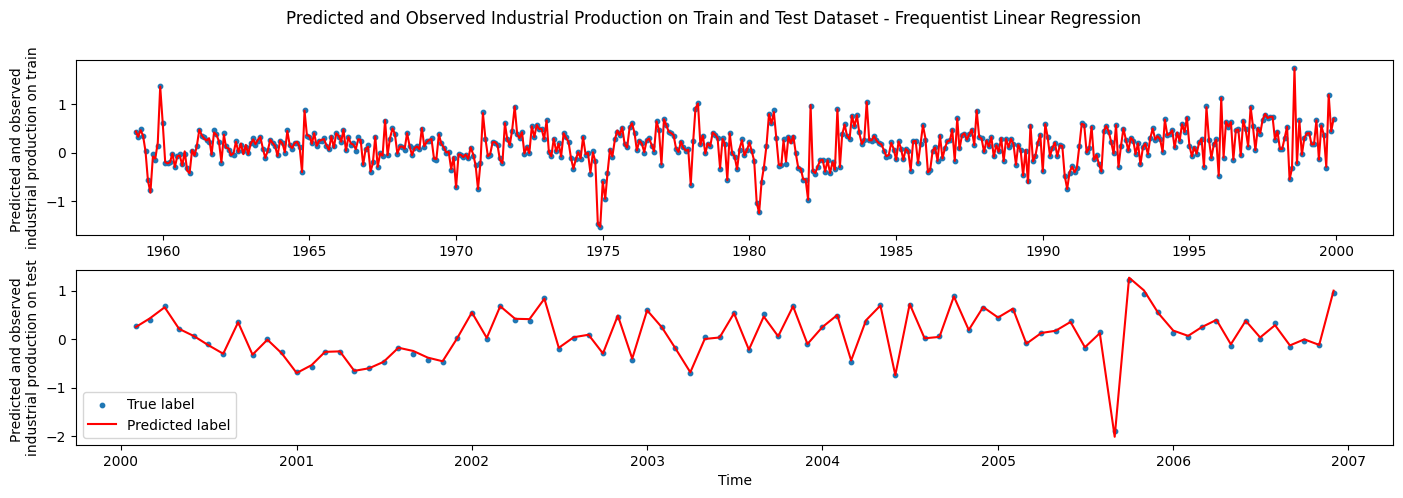

In [8]:
plt.figure(figsize=(17,5))
plt.subplot(2, 1, 1)
plt.scatter(train_df.index, y, marker='o', s=10, label="True label")
plt.plot(train_df.index, y_pred_train, color='red', label="Predicted label")
plt.ylabel("Predicted and observed \nindustrial production on train")

plt.subplot(2, 1, 2)
plt.scatter(test_df.index, y_test, marker='o', s=10, label="True label")
plt.plot(test_df.index, y_pred_test, color='red', label="Predicted label")
plt.xlabel('Time')
plt.ylabel("Predicted and observed \nindustrial production on test")

plt.suptitle("Predicted and Observed Industrial Production on Train and Test Dataset - Frequentist Linear Regression")
plt.legend()
plt.show()

## Lasso Regression

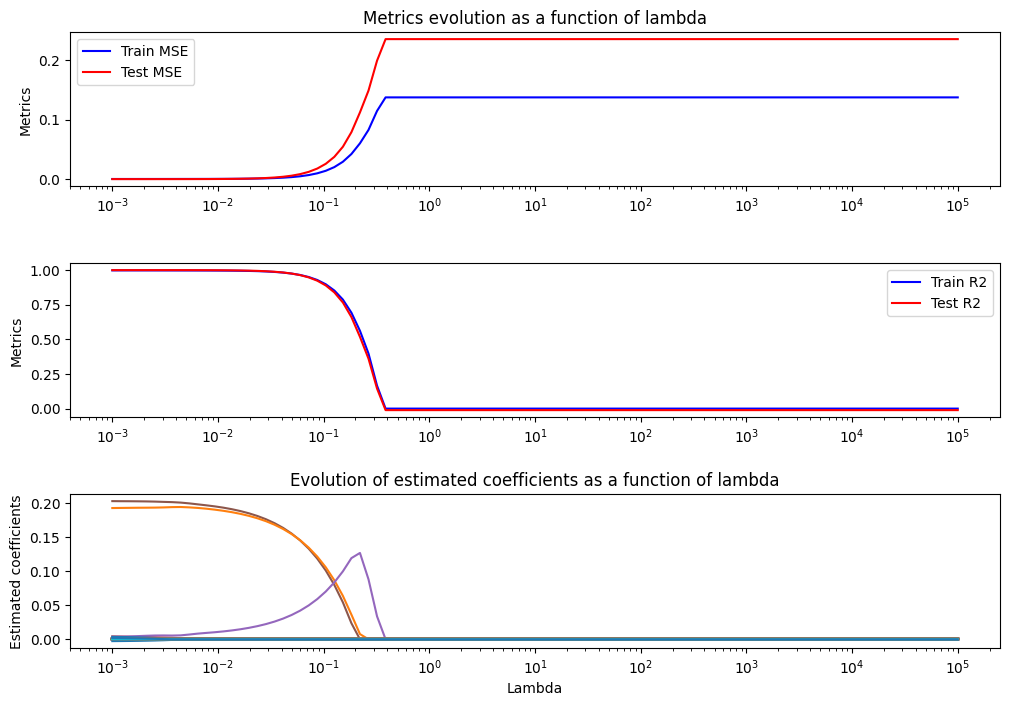

In [9]:
## Loop over lambda
range_alpha=np.logspace(-3, 5, 100)
list_mse_train=[]
list_mse_test=[]
list_r2_train=[]
list_r2_test=[]
list_parameters=[]

for alpha in range_alpha:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_transform, y)
    y_pred_train=lasso.predict(X_transform)
    y_pred_test=lasso.predict(X_test_transform)

    mse_train=mean_squared_error(y, y_pred_train)
    mse_test=mean_squared_error(y_test, y_pred_test)
    r2_train=r2_score(y, y_pred_train)
    r2_test=r2_score(y_test, y_pred_test)
    list_parameters_lasso=list(lasso.coef_)

    list_mse_train.append(mse_train)
    list_mse_test.append(mse_test)
    list_r2_train.append(r2_train)
    list_r2_test.append(r2_test)
    list_parameters.append(list_parameters_lasso)

array_parameters=np.array(list_parameters)

## Plots
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 1, 1)

plt.semilogx(range_alpha, list_mse_train, color='blue', label="Train MSE")
plt.plot(range_alpha, list_mse_test, color='red', label="Test MSE")
plt.ylabel("Metrics")
plt.legend()
plt.title("Metrics evolution as a function of lambda")

plt.subplot(3,1,2)
plt.semilogx(range_alpha, list_r2_train, color='blue', label="Train R2")
plt.plot(range_alpha, list_r2_test, color='red', label="Test R2")
plt.ylabel("Metrics")
plt.legend()

plt.subplot(3,1,3)
for j in range(array_parameters.shape[1]):
    plt.semilogx(range_alpha, array_parameters[:,j])
plt.xlabel("Lambda")
plt.ylabel("Estimated coefficients")
plt.title("Evolution of estimated coefficients as a function of lambda")
plt.show()

In [10]:
index_min_mse=np.argmin(list_mse_test)
optimal_lambda=range_alpha[index_min_mse]
print("Lambda minimizing test MSE: {}".format(round(optimal_lambda, 2)))

Lambda minimizing test MSE: 0.0
